# The "Catering Capacity": A Model by Meg and Sparsh

Project 1

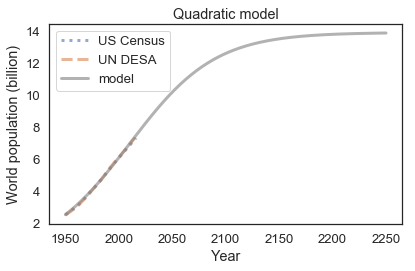

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

from pandas import read_html

filename = 'data/World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']

def pop_plot_results(census, un, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(census, ':', label='US Census')
    plot(un, '--', label='UN DESA')
    if len(timeseries):
        plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)
    
def pop_run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results
    
def pop_update_func_quad(pop, t, system):
    """Update population based on a quadratic model.
    
    pop: current population in billions
    t: what year it is
    system: system object with model parameters
    """
    net_growth = system.alpha * pop + system.beta * pop**2
    return pop + net_growth

un = table2.un / 1e9
census = table2.census / 1e9
empty = TimeSeries()
t_0 = get_first_label(census)
t_end = get_last_label(census)
p_0 = get_first_value(census)


pop_system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                alpha=0.025,
                beta=-0.0018)

pop_system.t_end = 2250

pop_results = pop_run_simulation(pop_system, pop_update_func_quad)
pop_plot_results(census, un, pop_results, 'Quadratic model')

# How does world food production affect earth's ability to actually reach the carrying capacity of 13.8888889 billion by 2050?

Since 1970, the food population has been growing fairly quadratically, as shown in the figure. Will there be enough food to cater to the population at the equilibrium point?

Will we be able to decrease the amount of food wasted to meet the future food demands?

To explore this question, we will model the carrying capacity and the food production rate, which we call the catering capacity.

We'll use our projection of the world population from 1950 to 2050, and compare it to the model's projected catering capacity of from 1950 till 2050.

Factors considered:
(i) Yield of Vegetables per hectare 
(ii) Total area used for crop production
(iii) Average quantity of food consumed by humans

# Linear Growth Model

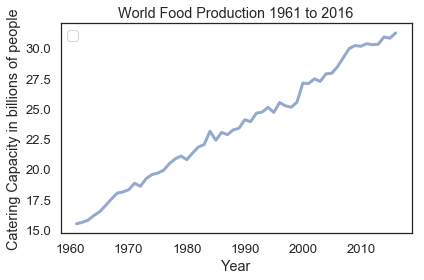

In [2]:
from pandas import read_csv
food_data = read_csv("FAOSTAT_data_9-24-2018.csv")
food_data.columns = ['Year', 'Unit', 'Value', 'Food production in billions of hg', 'Food_production_in_billions_of_pounds',  'Catering_Capacity_in_billions_of_people']


plot(food_data.Year, food_data.Catering_Capacity_in_billions_of_people)
decorate(title = "World Food Production 1961 to 2016",
        xlabel = "Year",
        ylabel = "Catering Capacity in billions of people")

'1996 pounds a year consumed by US at O% Waste'

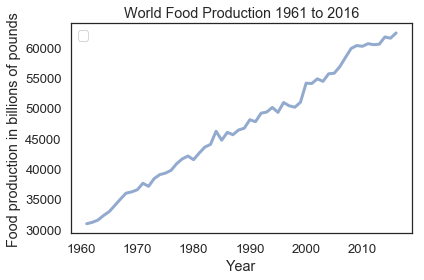

In [3]:
plot(food_data.Year, food_data.Food_production_in_billions_of_pounds)
decorate(title = "World Food Production 1961 to 2016",
        xlabel = "Year",
        ylabel = "Food production in billions of pounds")

'''1996 pounds a year consumed by US at O% Waste'''

In [4]:
Catering_Capacity_in_billions_of_people = food_data.Catering_Capacity_in_billions_of_people
Year = food_data.Year
food_data.head()

t_0 = get_first_value(Year)
t_end = get_last_value(Year)
elapsed_time = t_end - t_0

waste = 0
p_0 = get_first_value(Catering_Capacity_in_billions_of_people)
p_end = get_last_value(Catering_Capacity_in_billions_of_people)
total_growth = p_end - p_0
annual_growth = total_growth / elapsed_time

0.28667725327272725

In [5]:
system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                annual_growth=annual_growth,
                waste=waste)

,values
t_0,1961.000000
t_end,2016.000000
p_0,15.483111
annual_growth,0.286677
waste,0.000000


In [6]:
def run_simulation(system):
    """Runs the constant growth model.
    
    system: System object
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = (results[t] + system.annual_growth)
        
    return results

def plot_results2(cater, timeseries, title):
    """Plot the estimates and the model.
    
    cater: TimeSeries of food production / per capita food needs
    
    timeseries: TimeSeries of simulation results
    
    title: string
    """
    plot(food_data.Year, cater, ':', label='Catering Capacity (billions)')
    plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='Population (billions of people)',
             title=title)

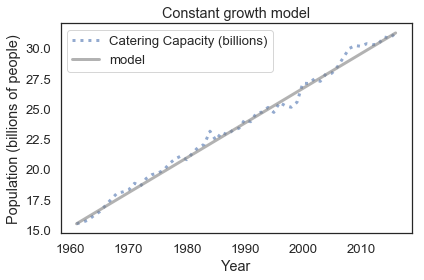

In [7]:
system.t_end = 2016
results = run_simulation(system)
plot_results2(Catering_Capacity_in_billions_of_people, results, 'Constant growth model')

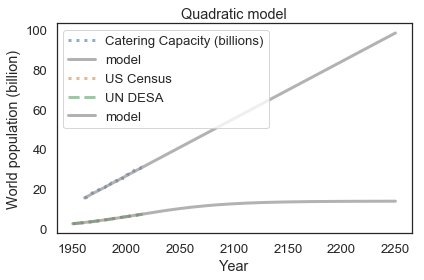

In [8]:
system.t_end = 2250
results = run_simulation(system)
plot_results2(Catering_Capacity_in_billions_of_people, results, 'Constant growth model')
pop_plot_results(census, un, pop_results, 'Quadratic model')

# Simulating Waste

Now we will change the waste factor to see if an increase in waste will cause the population growth model and the food production model to intersect.

In [9]:
def run_simulation2(system):
    """Runs the constant growth model.
    
    system: System object
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = (results[t] + (system.annual_growth*(1-system.waste)))
    return results

We ran a series of simulations to compare different levels of waste from 0 to 100%.

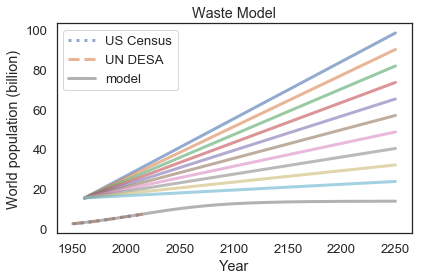

In [10]:
waste_array = 0
for i in range(10):
    system.waste = waste_array
    models = run_simulation2(system)
    plot(models)
    waste_array += 0.1
'''This loop simulates the net production of food in relation to different percentages of food waste created.'''
pop_plot_results(census, un, pop_results, 'Waste Model')

# Results

From this data, there seems to be no potential intercept between the food production and population up until at least 2250. This is based on many assumptions, like the fact that the data used only includes vegetable production. Additionally, the land resources are limited and as the population increases, the area available for the crop production will decrease. The pollution of the earth may affect the factors and conditions required for the the production of food. On the other hand, with the technological development of food industry, we can hope to reduce the waste percentage to sustain the current level of food production in the times to come.

# Interpretation

If there is no intercept, why are people still going hungry? Why do famines exist? This is not the conclusion we were expecting to find but it calls forward a bigger issue: while individuals in the U.S. and other first world countries easily waste food every day, others die of starvation. With the amount of resources we have, there shouldn't be individuals going hungry.

In conclusion, our model cannot fully grasp the hunger issue that exists and that may grow in the future. But it does raise the importance of global wellness and our need to address the hunger divide.